In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

alpha 2.113952557222273, beta 1.4539437943821187, gamma 1.4539437943821187, skew -1.3755689922318752
pval gamma: 0.2340934324385425, pval normal: 0.5


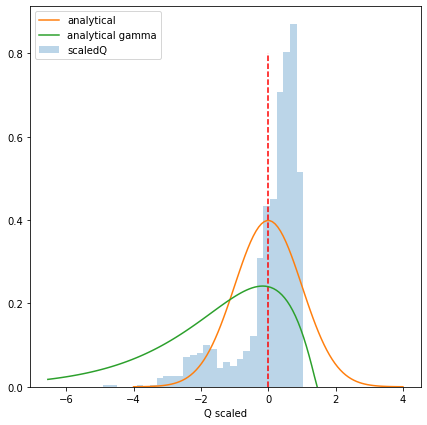

In [22]:
txtfile = "snp1_sb0.1_mu667.68_sigma0.70.txt"
txtfile = "snp0_sb0.1_mu669.28_sigma0.48.txt"
txtfile = "snp2_sb0.1_mu668.03_sigma0.68.txt"
txtfile = "snp3_sb0.1_mu669.34_sigma0.47.txt"

muQ     = float(txtfile.split("_")[2][2:])
sigmaQ  = float(txtfile.split("_")[2][5:8])
Q       = 0 # Q value for p-value calculation, should be the real Q value without shuffling

scaledQ   = np.loadtxt(txtfile)  # loads the shuffled and normalized Q values
skewQ     = np.sum(scaledQ**3) / len(scaledQ)  # Eq 41

if skewQ > 0:
    alpha= 4 / skewQ**2
    beta = 2 / skewQ
    gamma= 2 / skewQ
    Qx = Q - gamma
    pval_gamma = 1 - stats.gamma.cdf(Qx, alpha, loc=0, scale=beta)
else:
    alpha= 4 / skewQ**2
    beta = 2 / np.abs(skewQ)
    gamma= 2 / np.abs(skewQ)
    mean = -alpha/beta + gamma
    vari = alpha/(beta**2)

    Qx = -Q + gamma
    pval_gamma = stats.gamma.cdf(Qx, alpha, loc=0, scale=beta)

pval_normal = 1 - stats.norm.cdf(Q, loc=0, scale=1)

print(f"alpha {alpha}, beta {beta}, gamma {gamma}, skew {skewQ}")
print(f"pval gamma: {pval_gamma}, pval normal: {pval_normal}")

fig = plt.figure(figsize=(7,7))
ax1 = fig.add_subplot(111)

# Plot histogram of empirical values
ax1.hist(scaledQ, bins=30, alpha=0.3, density=True, label="scaledQ")
ax1.set_xlabel("Q scaled")

x  = np.linspace(-4, 4, 100)
x2 = np.linspace(0, 8, 100)
# Plot normal distribution
rv = stats.norm(loc = 0, scale = 1)
ax1.plot(x, rv.pdf(x), label = 'analytical')

if skewQ > 0:
    rv = stats.gamma(loc = 0, scale = beta, a = alpha)
    ax1.plot(x2-gamma, rv.pdf(x2), label = 'analytical gamma')
    ax1.vlines(Q, 0, 0.8, linestyle='dashed', color="red")
else:
    rv = stats.gamma(loc = 0, scale = beta, a = alpha)
    ax1.plot(-x2+gamma, rv.pdf(x2), label = 'analytical gamma')
    ax1.vlines(Q, 0, 0.8, linestyle='dashed', color="red")

ax1.legend()
plt.show()